### Analysing the titanic Survivors data and based on the analysis creating a classifying model to predict whether the person survived the accident or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
df_train = pd.read_csv('titanic_train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_test = pd.read_csv('titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.shape

(418, 11)

In [7]:
import seaborn as sns

In [8]:
sns.get_dataset_names()  # Already saved in sns class

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [9]:
data = sns.load_dataset('titanic')  # Loading Titanic dataset from seaborn library itself
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_train['Ticket'].nunique()

681

In [14]:
df_train.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df_train.groupby('Pclass').describe().T

Pclass                   1           2           3
Survived count  216.000000  184.000000  491.000000
         mean     0.629630    0.472826    0.242363
         std      0.484026    0.500623    0.428949
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      1.000000    0.000000    0.000000
         75%      1.000000    1.000000    0.000000
         max      1.000000    1.000000    1.000000
Age      count  186.000000  173.000000  355.000000
         mean    38.233441   29.877630   25.140620
         std     14.802856   14.001077   12.495398
         min      0.920000    0.670000    0.420000
         25%     27.000000   23.000000   18.000000
         50%     37.000000   29.000000   24.000000
         75%     49.000000   36.000000   32.000000
         max     80.000000   70.000000   74.000000
SibSp    count  216.000000  184.000000  491.000000
         mean     0.416667    0.402174    0.615071
         std      0.611898    0.601633    1.374883
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      1.000000    1.000000    1.000000
         max      3.000000    3.000000    8.000000
Parch    count  216.000000  184.000000  491.000000
         mean     0.356481    0.380435    0.393075
         std      0.693997    0.690963    0.888861
         min      0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000
         75%      0.000000    1.000000    0.000000
         max      4.000000    3.000000    6.000000
Fare     count  216.000000  184.000000  491.000000
         mean    84.154687   20.662183   13.675550
         std     78.380373   13.417399   11.778142
         min      0.000000    0.000000    0.000000
         25%     30.923950   13.000000    7.750000
         50%     60.287500   14.250000    8.050000
         75%     93.500000   26.000000   15.500000
         max    512.329200   73.500000   69.550000

In [16]:
df_train.groupby('Sex').describe().T

Sex                 female        male
Survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000
Pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
Age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
SibSp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
Parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
Fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200

In [17]:
df_train.groupby(['Sex','Pclass']).describe().T

Sex                 female                               male              \
Pclass                   1          2           3           1           2   
Survived count   94.000000  76.000000  144.000000  122.000000  108.000000   
         mean     0.968085   0.921053    0.500000    0.368852    0.157407   
         std      0.176716   0.271448    0.501745    0.484484    0.365882   
         min      0.000000   0.000000    0.000000    0.000000    0.000000   
         25%      1.000000   1.000000    0.000000    0.000000    0.000000   
         50%      1.000000   1.000000    0.500000    0.000000    0.000000   
         75%      1.000000   1.000000    1.000000    1.000000    0.000000   
         max      1.000000   1.000000    1.000000    1.000000    1.000000   
Age      count   85.000000  74.000000  102.000000  101.000000   99.000000   
         mean    34.611765  28.722973   21.750000   41.281386   30.740707   
         std     13.612052  12.872702   12.729964   15.139570   14.793894   
         min      2.000000   2.000000    0.750000    0.920000    0.670000   
         25%     23.000000  22.250000   14.125000   30.000000   23.000000   
         50%     35.000000  28.000000   21.500000   40.000000   30.000000   
         75%     44.000000  36.000000   29.750000   51.000000   36.750000   
         max     63.000000  57.000000   63.000000   80.000000   70.000000   
SibSp    count   94.000000  76.000000  144.000000  122.000000  108.000000   
         mean     0.553191   0.486842    0.895833    0.311475    0.342593   
         std      0.665865   0.642774    1.531573    0.546695    0.566380   
         min      0.000000   0.000000    0.000000    0.000000    0.000000   
         25%      0.000000   0.000000    0.000000    0.000000    0.000000   
         50%      0.000000   0.000000    0.000000    0.000000    0.000000   
         75%      1.000000   1.000000    1.000000    1.000000    1.000000   
         max      3.000000   3.000000    8.000000    3.000000    2.000000   
Parch    count   94.000000  76.000000  144.000000  122.000000  108.000000   
         mean     0.457447   0.605263    0.798611    0.278689    0.222222   
         std      0.728305   0.833930    1.237976    0.658853    0.517603   
         min      0.000000   0.000000    0.000000    0.000000    0.000000   
         25%      0.000000   0.000000    0.000000    0.000000    0.000000   
         50%      0.000000   0.000000    0.000000    0.000000    0.000000   
         75%      1.000000   1.000000    1.000000    0.000000    0.000000   
         max      2.000000   3.000000    6.000000    4.000000    2.000000   
Fare     count   94.000000  76.000000  144.000000  122.000000  108.000000   
         mean   106.125798  21.970121   16.118810   67.226127   19.741782   
         std     74.259988  10.891796   11.690314   77.548021   14.922235   
         min     25.929200  10.500000    6.750000    0.000000    0.000000   
         25%     57.244800  13.000000    7.854200   27.728100   12.331250   
         50%     82.664550  22.000000   12.475000   41.262500   13.000000   
         75%    134.500000  26.062500   20.221875   78.459375   26.000000   
         max    512.329200  65.000000   69.550000  512.329200   73.500000   

Sex                         
Pclass                   3  
Survived count  347.000000  
         mean     0.135447  
         std      0.342694  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      0.000000  
         max      1.000000  
Age      count  253.000000  
         mean    26.507589  
         std     12.159514  
         min      0.420000  
         25%     20.000000  
         50%     25.000000  
         75%     33.000000  
         max     74.000000  
SibSp    count  347.000000  
         mean     0.498559  
         std      1.288846  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      0.000000  
         max      8.000000  
Parch    co

In [18]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df_train.groupby('Embarked').describe().T

Embarked                 C          Q           S
Survived count  168.000000  77.000000  644.000000
         mean     0.553571   0.389610    0.336957
         std      0.498608   0.490860    0.473037
         min      0.000000   0.000000    0.000000
         25%      0.000000   0.000000    0.000000
         50%      1.000000   0.000000    0.000000
         75%      1.000000   1.000000    1.000000
         max      1.000000   1.000000    1.000000
Pclass   count  168.000000  77.000000  644.000000
         mean     1.886905   2.909091    2.350932
         std      0.944100   0.369274    0.789402
         min      1.000000   1.000000    1.000000
         25%      1.000000   3.000000    2.000000
         50%      1.000000   3.000000    3.000000
         75%      3.000000   3.000000    3.000000
         max      3.000000   3.000000    3.000000
Age      count  130.000000  28.000000  554.000000
         mean    30.814769  28.089286   29.445397
         std     15.434860  16.915396   14.143192
         min      0.420000   2.000000    0.670000
         25%     21.250000  17.500000   21.000000
         50%     29.000000  27.000000   28.000000
         75%     40.000000  34.500000   38.000000
         max     71.000000  70.500000   80.000000
SibSp    count  168.000000  77.000000  644.000000
         mean     0.386905   0.428571    0.571429
         std      0.557213   0.979105    1.216600
         min      0.000000   0.000000    0.000000
         25%      0.000000   0.000000    0.000000
         50%      0.000000   0.000000    0.000000
         75%      1.000000   0.000000    1.000000
         max      2.000000   4.000000    8.000000
Parch    count  168.000000  77.000000  644.000000
         mean     0.363095   0.168831    0.413043
         std      0.660481   0.656999    0.853253
         min      0.000000   0.000000    0.000000
         25%      0.000000   0.000000    0.000000
         50%      0.000000   0.000000    0.000000
         75%      1.000000   0.000000    0.000000
         max      3.000000   5.000000    6.000000
Fare     count  168.000000  77.000000  644.000000
         mean    59.954144  13.276030   27.079812
         std     83.912994  14.188047   35.887993
         min      4.012500   6.750000    0.000000
         25%     13.697950   7.750000    8.050000
         50%     29.700000   7.750000   13.000000
         75%     78.500025  15.500000   27.900000
         max    512.329200  90.000000  263.000000

In [20]:
round(100*(df_train.isnull().sum()/len(df_train)),2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Embarked     0.22
dtype: float64

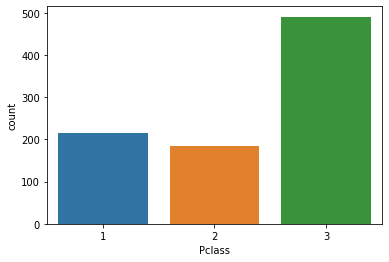

In [21]:
sns.countplot(x='Pclass',data = df_train)

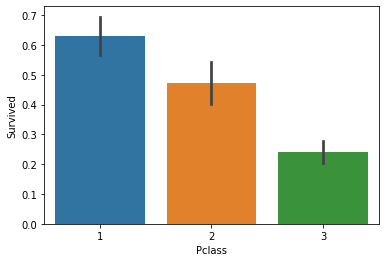

In [22]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

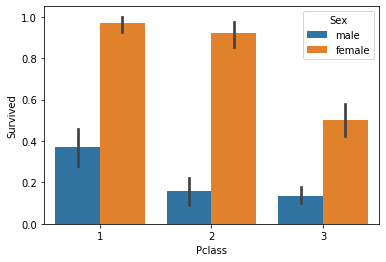

In [23]:
sns.barplot(x='Pclass',y='Survived',data=df_train,hue='Sex')

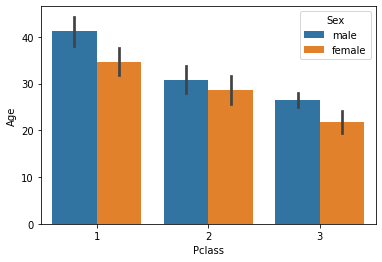

In [24]:
sns.barplot(x='Pclass',y='Age',data=df_train,hue='Sex')

In [25]:
def func(x):
    if pd.isnull(x['Age']):
        return df_train['Age'][(df_train['Pclass'] == x['Pclass']) & (df_train['Sex'] == x['Sex']) ].median()
    return x['Age']

In [26]:
df_train['Age']= df_train[['Age','Pclass','Sex']].apply(func,axis=1)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [28]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['Sex'],drop_first=True)],axis=1)

In [29]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,21.5,1,2,23.4500,S,0
889,1,1,male,26.0,0,0,30.0000,C,1


In [30]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['Embarked'])],axis=1)

In [31]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,0,1
888,0,3,female,21.5,1,2,23.4500,S,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,1,0,0


In [32]:
df_train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [33]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   C         891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


In [35]:
x = df_train.drop(['Survived','Fare','SibSp'],axis=1)
y= df_train['Survived']

In [36]:
from sklearn.model_selection import train_test_split

### Splitting data in train and test

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=56)

In [38]:
xtrain.head()

,Pclass,Age,Parch,male,C,Q,S
79,3,30.0,0,0,0,0,1
821,3,27.0,0,1,0,0,1
890,3,32.0,0,1,0,1,0
275,1,63.0,0,0,0,0,1
377,1,27.0,2,1,1,0,0


In [39]:
xtrain['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [40]:
ytrain.head()

79     1
821    1
890    0
275    1
377    0
Name: Survived, dtype: int64

### Evaluation

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
model.score(xtest,ytest)*100

84.75336322869956

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
ypred = model.predict(xtest)

In [47]:
print(confusion_matrix(ytest,ypred))

[[130  14]
 [ 20  59]]


In [48]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       144
           1       0.81      0.75      0.78        79

    accuracy                           0.85       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.85      0.85      0.85       223



### Deployment

In [49]:
pd.to_pickle(model,'TitanicSurvivalPrediction')

In [50]:
titanic_model = pd.read_pickle('TitanicSurvivalPrediction')

In [51]:
titanic_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)